<font color='pink'>Análise Estatística, Exploratória e Data Visualization </font>

<font color='green'>01) Fonte de dados: </font>

<font color='green'>Dados Públicos ou Privados </font>

<font color='green'>Sites com dados públicos: </font>

<font color='green'>* https://www.kaggle.com </font>

<font color='green'>* https://github.com/awesomedata/awesome-public-datasets</font>

<font color='green'>02) Carregamento e limpeza dos dados </font>

<font color='green'>Uso do banco de dados Habersman</font>

<font color='green'>Fonte: https://archive.ics.uci.edu/ml/datasets/haberman%27s+survival </font>


In [1]:
#Importar as biblitoecas
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [3]:
#Carregando o Dataset
haber_df = pd.read_csv('haberman.csv')

Descricao dos atributos

1. Age of patient at time of operation (numerical) 
2. Patient's year of operation (year - 1900, numerical) 
3. Number of positive axillary nodes detected (numerical) 
4. Survival status (class attribute) 
-- 1 = the patient survived 5 years or longer 
-- 2 = the patient died within 5 year

In [4]:
#Verificando a primeiras linhas
haber_df.head()

,age,year,nodes,status
0,30.0,64.0,1,1
1,30.0,62.0,3,1
2,30.0,65.0,0,1
3,31.0,59.0,2,1
4,31.0,65.0,4,1


In [5]:
#Verificando as últimas linhas
haber_df.tail()

,age,year,nodes,status
303,77.0,65.0,3,1
304,78.0,65.0,1,2
305,83.0,58.0,2,2
306,NaN,57.0,2,1
307,28.0,NaN,13,2


In [6]:
#Renomeando as colunas para português
haber_df = haber_df.rename(columns = {'age':'idade', 'year':'ano', 'nodes':'linfoma',
                                     'status':'status'})
haber_df

,idade,ano,linfoma,status
0,30.0,64.0,1,1
1,30.0,62.0,3,1
2,30.0,65.0,0,1
3,31.0,59.0,2,1
4,31.0,65.0,4,1
...,...,...,...,...
303,77.0,65.0,3,1
304,78.0,65.0,1,2
305,83.0,58.0,2,2
306,NaN,57.0,2,1


In [7]:
#Transformando a variável ano
#year = year - 1900, numerical
haber_df['ano'] = haber_df['ano'] + 1900
haber_df

,idade,ano,linfoma,status
0,30.0,1964.0,1,1
1,30.0,1962.0,3,1
2,30.0,1965.0,0,1
3,31.0,1959.0,2,1
4,31.0,1965.0,4,1
...,...,...,...,...
303,77.0,1965.0,3,1
304,78.0,1965.0,1,2
305,83.0,1958.0,2,2
306,NaN,1957.0,2,1


<font color='green'>03) Dados Faltantes ou Missing Values </font>

<font color='green'>Verificaç±ao das colunas</font>

In [8]:
#Verificando células nulas
haber_df.isnull().sum()

#Há valores faltantes
#O que fazer?

idade      1
ano        1
linfoma    0
status     0
dtype: int64

In [9]:
#Nesse caso, excluir valores "missing" ou faltantes
haber_df = haber_df.dropna()

In [10]:
#Verificando se foram excluidos
haber_df.isnull().sum()

idade      0
ano        0
linfoma    0
status     0
dtype: int64

<font color='green'>04) Correlaçao das variáveis </font>

<font color='green'>Matriz de correlacao </font>

In [11]:
#Criando um plot da correlacao
#Correlacao editada
corr = haber_df.corr() 
corr.style.background_gradient(cmap = 'coolwarm')

,idade,ano,linfoma,status
idade,1.000000,0.089529,-0.063176,0.067950
ano,0.089529,1.000000,-0.003764,-0.004768
linfoma,-0.063176,-0.003764,1.000000,0.286768
status,0.067950,-0.004768,0.286768,1.000000


<font color='green'>05) Plot das variáveis </font>

<font color='green'>Matplotlib e seaborn </font>

<font color='green'>seaborn: https://seaborn.pydata.org </font>


<IPython.core.display.Javascript object>


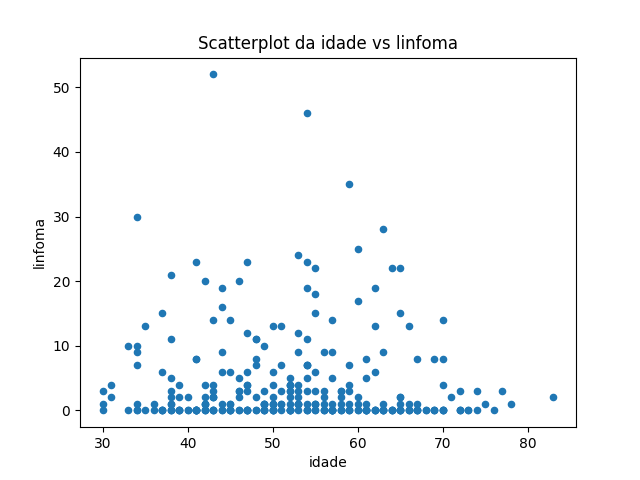

In [12]:
#Avaliando numéricas: idade e linfoma
#Há um padrao entre idade e linfoma?
%matplotlib notebook
haber_df.plot(kind = 'scatter', x = 'idade', y = 'linfoma')
plt.title('Scatterplot da idade vs linfoma')
plt.show()

<IPython.core.display.Javascript object>


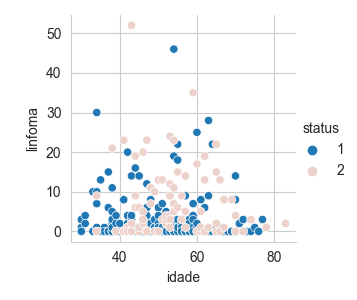

In [66]:
#Plot utilizando a biblioteca seaborn
%matplotlib notebook
g = sns.FacetGrid(haber_df, hue = "status")
g.map_dataframe(sns.scatterplot, x = "idade", y = "linfoma", hue = "status")
g.add_legend()
#g.savefig('Facet.png')

#1 sobreviveu mais que 5 anos
#2 sobreviveu menos que 5 anos

<IPython.core.display.Javascript object>


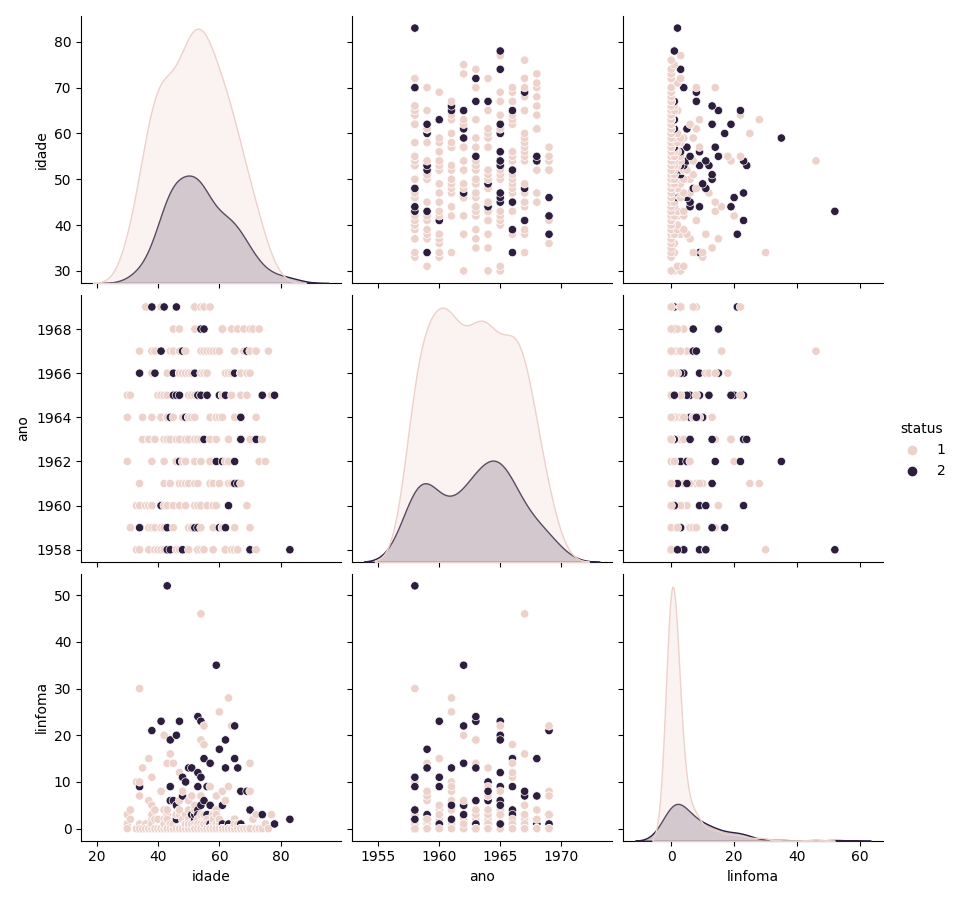

In [13]:
#Visualizacao de todas as variaveis, destacando o "status"
%matplotlib notebook
g = sns.pairplot(haber_df, hue = 'status', height = 3)
plt.show()

<font color='green'>06) Análise Estatística - Estatística Descritiva </font>

<font color='green'> Medidas de Tendência Central </font>

<font color='green'> Os dados tendem a se agrupar em torno de valores que comumente chamamos de medidas de tendência central:
</font>

<font color='green'> 6.1 Média (mean, average): é como se fosse o ponto de equilíbrio da distribuição
</font>

In [14]:
#Como avaliar a média de uma coluna
haber_df['idade'].mean()
haber_df['ano'].mean()
haber_df['linfoma'].mean()
haber_df['ano'].mean()

1962.8529411764705

<font color='green'>6 Medidas de Tendência Central </font>

<font color='green'> 6.2 Moda: definida como o valor mais frequente de um grupo de valores, ou seja, o valor de maior ocorrência dentre os valores observados. A representação da moda é dada por Mo.
</font>

In [15]:
#Como avaliar a moda de uma coluna
haber_df['idade'].mode()
haber_df['ano'].mode()
haber_df['linfoma'].mode() #zero
haber_df['ano'].mode()

0    1958.0
dtype: float64

<font color='green'> Medidas de Tendência Central </font>

<font color='green'> 6.3 Mediana: valor que divide os dados ordenados em duas partes.
A mediana, já apresentada em medidas separatrizes, é também utilizada como uma medida de tendência central, sendo mais robusta que a média, já que não é tão sensível à presença de outliers.<font color='green'> 

In [16]:
#Como avaliar a mediana de uma coluna
haber_df['idade'].median()
haber_df['ano'].median()
haber_df['linfoma'].median() #zero
haber_df['ano'].median()

1963.0

<font color='green'> 7 Medidas de Dispersao </font>

<font color='green'> Avalia se os dados estão mais concentrados ou mais dispersos em torno de alguma medida de tendência central, em geral, a média.
</font>

<font color='green'> 7.1 Variância: Variância (variance): é mais utilizada de forma comparativa, já que não é muito intuitiva por não estar na mesma unidade dos dados. </font>


In [17]:
#Como avaliar a variância de uma coluna
haber_df['idade'].var()
haber_df['ano'].var()
haber_df['linfoma'].var() #zero
haber_df['ano'].var()

10.558630665380907

<font color='green'> 7.2 Desvio Padr±ao (standard deviation): mais utilizado por estar na unidade dos dados. É a raiz quadrada da variância. </font>

In [18]:
#Como avaliar o desvio padrao de uma coluna
haber_df['idade'].std()
haber_df['ano'].std()
haber_df['linfoma'].std() #zero
haber_df['ano'].std()

3.2494046632238507

<font color='green'> Os valores de desvio padrão também estão no conjunto dos números Reais Positivos, ou seja, se você encontrar um valor negativo, seus cálculos necessitam de revisão.

Considerando uma distribuição normal, 68% dos valores estão a 1 desvio padrão de distância da média: </font>


![dist](../Aula-09-Analise-Exploratoria/dist.png)

In [19]:
#Resumo Estatístico
haber_df.describe()

,idade,ano,linfoma,status
count,306.000000,306.000000,306.000000,306.000000
mean,52.457516,1962.852941,4.026144,1.264706
std,10.803452,3.249405,7.189654,0.441899
min,30.000000,1958.000000,0.000000,1.000000
25%,44.000000,1960.000000,0.000000,1.000000
50%,52.000000,1963.000000,1.000000,1.000000
75%,60.750000,1965.750000,4.000000,2.000000
max,83.000000,1969.000000,52.000000,2.000000


<font color='green'> 8 Boxplot e Quartis </font>

<font color='green'> O Boxplot é um diagrama de caixa construído utilizando as referências de valores mínimos e máximos, primeiro e terceiro quartil, mediana e outliers da base de dados.
</font>

![boxplot](../Aula-09-Analise-Exploratoria/boxplot.png)

<font color='green'> Observacao: Outliers </font>

<font color='green'> Outliers: Os outliers são dados que se diferenciam drasticamente de todos os outros, são pontos fora da curva normal (o que é curva normal?). Em outras palavras, um outlier é um valor que foge da normalidade e que pode (e provavelmente irá) causar anomalias nos resultados obtidos por meio de algoritmos e sistemas de análise.
</font>

<IPython.core.display.Javascript object>


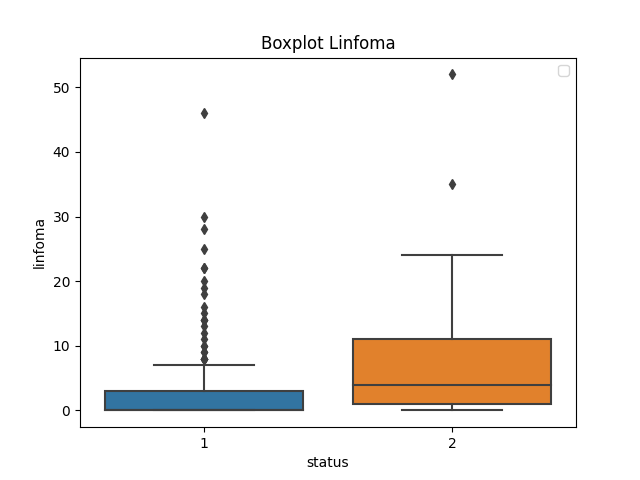

No handles with labels found to put in legend.


In [20]:
#Avaliando Boxplots e variáveis
#Linfoma
%matplotlib notebook
sns.boxplot(x = 'status', y = 'linfoma', data = haber_df)
plt.legend()
plt.title('Boxplot Linfoma')
plt.show()

<IPython.core.display.Javascript object>


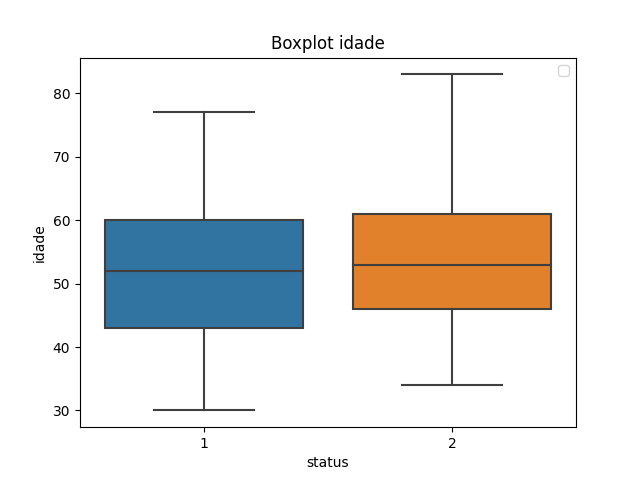

No handles with labels found to put in legend.


In [21]:
#idade
%matplotlib notebook
sns.boxplot(x = 'status', y = 'idade', data = haber_df)
plt.legend()
plt.title('Boxplot idade')
plt.show()

<IPython.core.display.Javascript object>


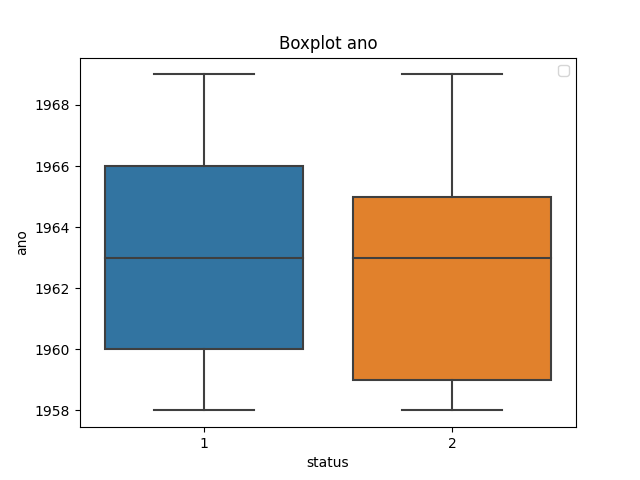

No handles with labels found to put in legend.


In [22]:
#ano
%matplotlib notebook
sns.boxplot(x = 'status', y = 'ano', data = haber_df)
plt.legend()
plt.title('Boxplot ano')
plt.show()

<font color='green'> 9 Histograma </font>

<font color='green'> Um histograma é uma espécie de gráfico de barras que demonstra uma distribuição de frequências. No histograma, a base de cada uma das barras representa uma classe e a altura representa a quantidade ou frequência absoluta com que o valor de cada classe ocorre.
</font>

<IPython.core.display.Javascript object>


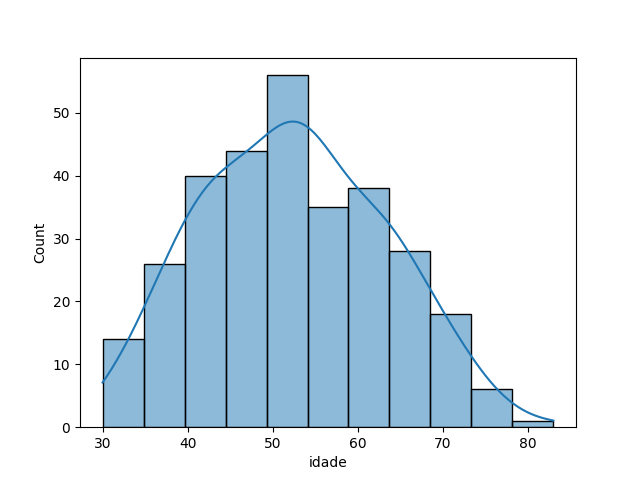

<AxesSubplot:xlabel='idade', ylabel='Count'>

In [23]:
#Plotando o histograma da idade
%matplotlib notebook
sns.histplot(data = haber_df, x = 'idade', kde = True)

<IPython.core.display.Javascript object>


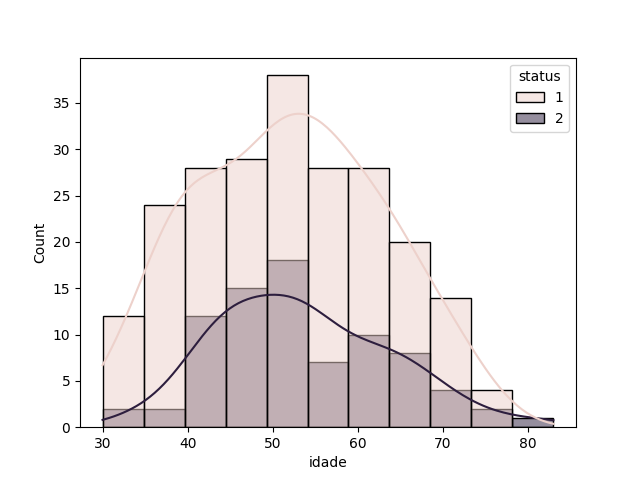

In [24]:
#Plotando o histograma da idade com o marcador (hue) de status
%matplotlib notebook
g = sns.histplot(data = haber_df, x = 'idade', hue = 'status', kde = True)
#g.savefig('hist.png')

#Há distribuicao normal dos dados?